# Analysis Ibague's Trees Species

## DS4A-Colombia
Team 123 

Members:

    1. Eduard Molano
    2. Leonardo Pérez
    3. Daniel Ruiz
    4. Luisa de la Hortúa
    5. Stiven Cabrera
    6. Juan Bautista

Resumen del trabajo

Resumen del modelo utilizado

### Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import SMOTE 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 


from tensorflow import keras

### Data 

In [5]:
df = pd.read_csv('Datos_Ibague.csv', sep=';')
df.head()

,OBJECTID,OBJECTID_1,Codigo_Uni,fecha,municipio,comuna,zona,subzona,cod_censista,num_arbol,familia,nom_cientifico,nom_comun,procedencia,UICN,habito_creciemiento,emplazamiento,altura_fuste,altura_total,diametro_copa,diametro_normal,volumen_m3,inc,rd,dm,bbs,abs,estado_fisico,pi,ph,pa,pd,pe,pp,po,estado_sanitario,densidad_follaje,valor_estetico,cre,crh,cra,coa,ce,civ,crt,crg,cap,r_vol,r_cr,r_ce,fotografia,fase,GlobalID,X,Y,Barrio
0,98717,56585,67352 - F3,16/05/2017,Ibague,7,4,4,Cuadrilla_12,67352,Myrtaceae,Syzygium_malaccense,Pera_de_malaca,Exotica,LC,Arbol,Zona_blanda,3,"5,2",2,"18,3","0,523170648",0,0,0,0,0,Malo,20,0,0,80,0,0,0,Muerto,Ralo,Inaceptable,No,No,No,No,No,No,No,No,No,0,0,0,C:\Users\juan-arias.CORTOLI1\Documents\ArcGIS\...,F3,{DF618195-9BA3-42B8-B900-153874CA5FD7},"883744,684","984472,5618",Otro
1,99083,61808,65768 - F3,16/05/2017,Ibague,7,4,4,Cuadrilla_10,65768,Fabaceae,Pithecellobium_dulce,Payande,Nativa,LC,Arbol,Zona_blanda,"0,5","4,9","2,5","17,7","0,476824194",0,0,20,40,20,Regular,0,0,0,20,0,0,0,Sano,Denso,Deseable,No,No,No,Si,No,No,No,No,No,0,0,0,C:\Users\juan-arias.CORTOLI1\Documents\ArcGIS\...,F3,{F03C72BE-7978-4F7C-B2D3-A6525632AE19},"883742,6131","984515,2839",Otro
2,98669,66706,65769 - F3,16/05/2017,Ibague,7,4,4,Cuadrilla_10,65769,Combretaceae,Terminalia_catappa,Almendro,Exotica,NE,Arbol,Zona_blanda,"3,5","5,5",5,27,"0,8164233",0,20,0,0,0,Bueno,0,0,0,20,0,0,0,Sano,Denso,Deseable,No,No,No,Si,No,Si,No,No,No,20,20,0,C:\Users\juan-arias.CORTOLI1\Documents\ArcGIS\...,F3,{0ADD2CC1-1E82-4EC2-B98D-7DD8016B71D3},"883741,3773","984466,8292",Otro
3,99327,59629,65767 - F3,16/05/2017,Ibague,7,4,4,Cuadrilla_10,65767,Fabaceae,Pithecellobium_dulce,Payande,Nativa,LC,Arbol,Zona_blanda,"0,6","3,8",3,"11,6","0,242343024",20,0,20,0,20,Regular,20,0,0,0,0,0,0,Sano,Denso,Deseable,No,No,No,Si,No,No,No,No,No,0,0,0,C:\Users\juan-arias.CORTOLI1\Documents\ArcGIS\...,F3,{03AAD258-1A06-4A17-8EB0-A7E5AA323338},"883741,158","984540,5588",Otro
4,98884,64850,66071 - F3,16/05/2017,Ibague,7,4,4,Cuadrilla_11,66071,Myrtaceae,Psidium_guajava,Guayabo,Nativa,NE,Arbol,Zona_blanda,"3,6","7,5",5,21,"0,8659035",20,0,0,0,0,Bueno,0,0,0,0,0,0,0,Sano,Denso,Deseable,No,No,No,Si,No,No,No,No,No,0,0,0,C:\Users\juan-arias.CORTOLI1\Documents\ArcGIS\...,F3,{A942F3CE-2719-416E-9F46-F3A03E97BD97},"883741,0111","984493,2908",Otro


In [6]:
df['fecha'] = pd.to_datetime(df.fecha)
def sort_unique(column_name):
    return df[column_name].sort_values().unique()
sci_names = list(sort_unique('nom_cientifico'))
def splitting_sci_names(name):
    if '?�' in name:
        return str(name).split('?�')
    return str(name).split('_')
split_names = list(map(splitting_sci_names, sci_names))

def grouping_trees_by_gender(split_names):
    trees_by_gender = {}
    for tree in split_names:
        gender = tree[0]
        specie = tree[1]
        if not gender in trees_by_gender:
            trees_by_gender[gender] = []
        trees_by_gender[gender].append(specie)
    return trees_by_gender

grouping_trees_by_gender(split_names)
def fixing_sci_names(name):
    if '?�' in name:
        return str(name).replace('?�', '_')
    return name

df['nom_cientifico'] = df.nom_cientifico.apply(fixing_sci_names)
df['familia'] = df.familia.str.strip()

dicc_UICN = {
    'CR':'En_peligro_critico',
    'EN':'En_peligro_vulnerable',
    'EW':'Extinto_en_estado_silvestre',
    'LC':'Preocupacion_menor',
    'NE':'No_evaluado',
    'NT':'Casi_amenazado',
    'VU':'Vulnerable'
}

df['UICN'] = df['UICN'].replace(to_replace=dicc_UICN)
df.rename(columns={'habito_creciemiento':'habito_crecimiento'}, inplace=True)
df.rename(columns={'estado_sanitario ':'estado_sanitario'}, inplace=True)
var = ['nom_cientifico','familia','nom_comun','procedencia','UICN','habito_crecimiento','emplazamiento','estado_fisico','densidad_follaje','valor_estetico','comuna','fase', 'Barrio']
df[var] = df[var].astype('category')
dicc_c = {
    'No':'0',
    'Si':'1'
}
var_c=['cre', 'crh', 'cra', 'coa', 'ce', 'civ', 'crt', 'crg', 'cap']
df[var_c] = df[var_c].replace(to_replace=dicc_c)
df[var_c] = df[var_c].astype('int64')

df.rename(columns={'altura_fuste ':'altura_fuste'}, inplace=True)
float_columns = ['altura_fuste', 'altura_total', 'diametro_copa', 'diametro_normal', 'volumen_m3']
for column in float_columns:
    df[column] = df[column].apply(lambda x: str(x).replace(',', '.'))
dypsis_median = df[(df.nom_cientifico == 'Dypsis_lutescens') & (df.comuna == 7) & (df.diametro_copa != '<NULL>')].diametro_copa.median()
df.at[857, 'diametro_copa'] = dypsis_median
cassia_mean = round((df[(df.nom_cientifico == 'Cassia_fistula') & (df.comuna == 7) & (df.diametro_copa != '<NULL>')].diametro_copa).astype('float').mean(), 1)
df.at[1720, 'diametro_copa'] = cassia_mean
syzygium_mean = round((df[(df.nom_cientifico == 'Syzygium_malaccense') & (df.comuna == 5) & (df.diametro_copa != '<NULL>')].diametro_copa).astype('float').mean(), 1)
df.at[50485, 'diametro_copa'] = syzygium_mean
for column in float_columns:
    df[column] = df[column].astype('float')

In [7]:
df=df[df['zona']!='--']
df=df[df['subzona']!='--']
df[df['fecha']!='1899-12-30']
df=df.drop(['fecha','cod_censista','municipio','nom_cientifico','nom_comun','OBJECTID','OBJECTID_1','Codigo_Uni','num_arbol', 'fotografia', 'GlobalID', 'X', 'Y', 'Barrio', 'zona', 'subzona', 'volumen_m3','diametro_copa','altura_total','inc','abs','dm','valor_estetico', 'fase', 'UICN', 'procedencia'],axis=1)

In [8]:
var_bool= ['rd', 'bbs', 'pi', 'ph', 'pa', 'pd', 'pe', 'pp', 'po', 'cre', 'crh', 'cra', 'coa','ce', 'civ', 'crt', 'crg', 'cap', 'r_vol', 'r_cr', 'r_ce']
df[var_bool]=np.where(df[var_bool]==0, 0, 1)
df

,comuna,familia,habito_crecimiento,emplazamiento,altura_fuste,diametro_normal,rd,bbs,estado_fisico,pi,ph,pa,pd,pe,pp,po,estado_sanitario,densidad_follaje,cre,crh,cra,coa,ce,civ,crt,crg,cap,r_vol,r_cr,r_ce
0,7,Myrtaceae,Arbol,Zona_blanda,3.0,18.3,0,0,Malo,1,0,0,1,0,0,0,Muerto,Ralo,0,0,0,0,0,0,0,0,0,0,0,0
1,7,Fabaceae,Arbol,Zona_blanda,0.5,17.7,0,1,Regular,0,0,0,1,0,0,0,Sano,Denso,0,0,0,1,0,0,0,0,0,0,0,0
2,7,Combretaceae,Arbol,Zona_blanda,3.5,27.0,1,0,Bueno,0,0,0,1,0,0,0,Sano,Denso,0,0,0,1,0,1,0,0,0,1,1,0
3,7,Fabaceae,Arbol,Zona_blanda,0.6,11.6,0,0,Regular,1,0,0,0,0,0,0,Sano,Denso,0,0,0,1,0,0,0,0,0,0,0,0
4,7,Myrtaceae,Arbol,Zona_blanda,3.6,21.0,0,0,Bueno,0,0,0,0,0,0,0,Sano,Denso,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101280,1,Myrtaceae,Arbol,Zona_blanda,1.6,5.1,0,0,Regular,1,1,1,1,0,0,0,Enfermo,Ralo,0,0,0,1,0,0,0,0,0,0,0,0
101281,1,Arecaceae,Palma,Zona_blanda,6.0,13.2,1,0,Bueno,0,0,0,0,1,0,1,Sano,Denso,0,0,0,0,1,0,1,0,0,0,1,1
101282,1,Myrtaceae,Arbol,Zona_blanda,1.4,19.0,0,0,Regular,1,0,0,1,0,0,0,Sano,Denso,0,0,0,1,0,0,0,0,0,1,1,0
101283,1,Malvaceae,Arbusto,Zona_blanda,2.0,5.0,0,1,Regular,1,0,0,0,0,0,0,Sano,Ralo,0,0,0,0,0,0,0,0,0,0,0,0


### Dataset division

In [9]:
df['estado_sanitario'].value_counts()

Sano       95736
Enfermo     3885
Muerto      1107
Critico      543
Name: estado_sanitario, dtype: int64

In [10]:
df_x=df.drop('estado_sanitario', axis=1)
df_y = df['estado_sanitario']
final_df_x = pd.get_dummies(df_x,columns=df_x.columns[df_x.dtypes=='category'])#, drop_first=True)
final_df_x

,altura_fuste,diametro_normal,rd,bbs,pi,ph,pa,pd,pe,pp,po,cre,crh,cra,coa,ce,civ,crt,crg,cap,r_vol,r_cr,r_ce,comuna_1,comuna_2,comuna_3,comuna_4,comuna_5,comuna_6,comuna_7,comuna_8,comuna_9,comuna_10,comuna_11,comuna_12,comuna_13,familia_Acanthaceae,familia_Adoxaceae,familia_Amaranthaceae,familia_Anacardiaceae,familia_Annonaceae,familia_Apocynaceae,familia_Araliaceae,familia_Araucariaceae,familia_Arecaceae,familia_Asparagaceae,familia_Asteraceae,familia_Basellaceae,familia_Bignoniaceae,familia_Bixaceae,familia_Boraginaceae,familia_Burseraceae,familia_Cactaceae,familia_Calophyllaceae,familia_Cannabaceae,familia_Capparidaceae,familia_Caricaceae,familia_Casuarinaceae,familia_Chrysobalanaceae,familia_Clusiaceae,familia_Combretaceae,familia_Compositae,familia_Cupressaceae,familia_Cycadaceae,familia_Erythroxylaceae,familia_Estrelitziaceae,familia_Euphorbiaceae,familia_Fabaceae,familia_Hernandiaceae,familia_Hipericaceae,familia_Juglandaceae,familia_Lacistemataceae,familia_Lamiaceae,familia_Lauraceae,familia_Lecythidaceae,familia_Leguminosae,familia_Lythraceae,familia_Magnoliaceae,familia_Malpighiaceae,familia_Malvaceae,familia_Melastomataceae,familia_Meliaceae,familia_Moraceae,familia_Moringaceae,familia_Muntingiaceae,familia_Myrtaceae,familia_Nyctaginaceae,familia_Ocnaceae,familia_Oleaceae,familia_Oxalidaceae,familia_Pandanaceae,familia_Passifloraceae,familia_Phyllanthaceae,familia_Pinaceae,familia_Piperaceae,familia_Plumbaginaceae,familia_Poaceae,familia_Podocarpaceae,familia_Poligonaceae,familia_Primulaceae,familia_Proteaceae,familia_Ramnaceae,familia_Rosaceae,familia_Rubiaceae,familia_Rutaceae,familia_Salicaceae,familia_Sapindaceae,familia_Sapotaceae,familia_Scrophulariaceae,familia_Simarubaceae,familia_Solanaceae,familia_Taxodiaceae,familia_Thymelaeaceae,familia_Urticaceae,familia_Verbenaceae,familia_Zygophyllaceae,habito_crecimiento_Arbol,habito_crecimiento_Arbusto,habito_crecimiento_Bambu,habito_crecimiento_Palma,emplazamiento_Alcorque,emplazamiento_Anden,emplazamiento_Antejardin,emplazamiento_Glorieta,emplazamiento_Parque,emplazamiento_Separador_vial,emplazamiento_Zona_blanda,estado_fisico_Bueno,estado_fisico_Malo,estado_fisico_Regular,densidad_follaje_Denso,densidad_follaje_Medio,densidad_follaje_Ralo
0,3.0,18.3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,0.5,17.7,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,3.5,27.0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
3,0.6,11.6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0
4,3.6,21.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [11]:
train_X, val_X, train_y, val_y = train_test_split(final_df_x, df_y, test_size=0.2,random_state=7) 
print(train_X.shape) 
print(val_X.shape)  

(81016, 133)
(20255, 133)


In [12]:
train_y.value_counts()

Sano       76624
Enfermo     3093
Muerto       870
Critico      429
Name: estado_sanitario, dtype: int64

In [13]:
sm=SMOTE()
train_X, train_y=sm.fit_resample(train_X, train_y)

In [14]:
train_y.value_counts()

Muerto     76624
Sano       76624
Enfermo    76624
Critico    76624
Name: estado_sanitario, dtype: int64

In [15]:
forest = RandomForestClassifier(random_state=7, n_estimators=100)
knn = KNeighborsClassifier(n_neighbors=5)
dt=DecisionTreeClassifier(class_weight='balanced')
svc=SVC()

## Support Vector Clasificaction

In [ ]:
svc.fit(train_X, train_y)
y_pred=svc.predict(val_X)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Support Vector Clasification model is',round(accuracy_score(val_y, y_pred)*100,2))
print(accuracy_score(val_y, y_pred))

In [ ]:
kfold = KFold(n_splits=10, random_state=None)
result_svc=cross_val_score(svc,final_df_x,df_y,cv=10,scoring='accuracy')
print('The cross validated score for Support Vector Clasification is:',round(result_svc.mean()*100,2))

In [ ]:
print(classification_report(val_y, y_pred))

In [ ]:
target_names=[ "Critico","Enfermo","Muerto","Sano"]
cm = confusion_matrix(val_y, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2%', cmap="YlGnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix', y=1.05, size=15);

## Decision Tree

In [16]:
dt.fit(train_X, train_y)
y_pred=dt.predict(val_X)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Decision Tree model is',round(accuracy_score(val_y, y_pred)*100,2))
print(accuracy_score(val_y, y_pred))

--------------The Accuracy of the model----------------------------
The accuracy of the Decision Tree model is 93.19
0.9318686744013823


In [17]:
kfold = KFold(n_splits=10, random_state=None)
result_dt=cross_val_score(dt,final_df_x,df_y,cv=10,scoring='accuracy')
print('The cross validated score for Decision Tree model is:',round(result_dt.mean()*100,2))

The cross validated score for Decision Tree model is: 92.27


In [18]:
print(classification_report(val_y, y_pred))

              precision    recall  f1-score   support

     Critico       0.19      0.23      0.21       114
     Enfermo       0.31      0.41      0.35       792
      Muerto       0.61      0.64      0.62       237
        Sano       0.98      0.96      0.97     19112

    accuracy                           0.93     20255
   macro avg       0.52      0.56      0.54     20255
weighted avg       0.94      0.93      0.94     20255



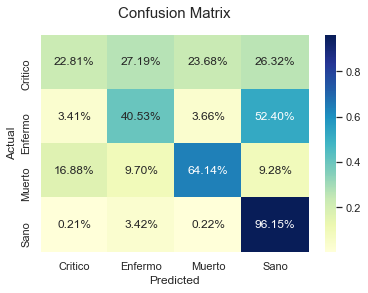

In [19]:
target_names=[ "Critico","Enfermo","Muerto","Sano"]
cm = confusion_matrix(val_y, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2%', cmap="YlGnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix', y=1.05, size=15);

## Random Forest

In [20]:
forest.fit(train_X, train_y)
y_pred=forest.predict(val_X)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the Random Forest model is',round(accuracy_score(val_y, y_pred)*100,2))
print(accuracy_score(val_y, y_pred))

--------------The Accuracy of the model----------------------------
The accuracy of the Random Forest model is 95.34
0.9533942236484818


In [21]:
kfold = KFold(n_splits=10, random_state=None)
result_rf=cross_val_score(forest,final_df_x,df_y,cv=10,scoring='accuracy')
print('The cross validated score for Random Forest model is:',round(result_rf.mean()*100,2))

The cross validated score for Random Forest model is: 95.06


In [22]:
print(classification_report(val_y, y_pred))

              precision    recall  f1-score   support

     Critico       0.41      0.11      0.17       114
     Enfermo       0.47      0.54      0.50       792
      Muerto       0.71      0.85      0.78       237
        Sano       0.98      0.98      0.98     19112

    accuracy                           0.95     20255
   macro avg       0.65      0.62      0.61     20255
weighted avg       0.95      0.95      0.95     20255



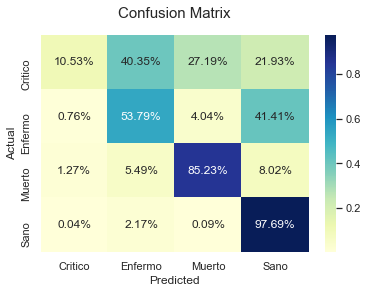

In [23]:
target_names=[ "Critico","Enfermo","Muerto","Sano"]
cm = confusion_matrix(val_y, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2%', cmap="YlGnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix', y=1.05, size=15);

## Neural Networks

In [36]:
train_y_enc = pd.get_dummies(train_y)

In [37]:
model=keras.Sequential([
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [38]:
history=model.fit(train_X, train_y_enc, epochs=100, validation_split=0.2)

Epoch 1/100
7663/7663 [==============================] - 30s 4ms/step - loss: 0.7143 - accuracy: 0.7118 - val_loss: 1.1078 - val_accuracy: 0.0667
Epoch 2/100
7663/7663 [==============================] - 27s 4ms/step - loss: 0.5449 - accuracy: 0.7787 - val_loss: 1.9285 - val_accuracy: 0.0676
Epoch 3/100
7663/7663 [==============================] - 23s 3ms/step - loss: 0.4976 - accuracy: 0.8008 - val_loss: 1.5345 - val_accuracy: 0.1523
Epoch 4/100
7663/7663 [==============================] - 22s 3ms/step - loss: 0.4689 - accuracy: 0.8134 - val_loss: 1.0735 - val_accuracy: 0.3593
Epoch 5/100
7663/7663 [==============================] - 19s 2ms/step - loss: 0.4456 - accuracy: 0.8239 - val_loss: 1.8814 - val_accuracy: 0.1431
Epoch 6/100
7663/7663 [==============================] - 18s 2ms/step - loss: 0.4307 - accuracy: 0.8306 - val_loss: 0.8127 - val_accuracy: 0.6466
Epoch 7/100
7663/7663 [==============================] - 18s 2ms/step - loss: 0.4156 - accuracy: 0.8362 - val_loss: 1.2136 -

Epoch 57/100
7663/7663 [==============================] - 18s 2ms/step - loss: 0.3240 - accuracy: 0.8729 - val_loss: 1.1236 - val_accuracy: 0.5113
Epoch 58/100
7663/7663 [==============================] - 21s 3ms/step - loss: 0.3229 - accuracy: 0.8732 - val_loss: 0.9439 - val_accuracy: 0.5597
Epoch 59/100
7663/7663 [==============================] - 21s 3ms/step - loss: 0.3226 - accuracy: 0.8736 - val_loss: 0.6468 - val_accuracy: 0.7369
Epoch 60/100
7663/7663 [==============================] - 20s 3ms/step - loss: 0.3217 - accuracy: 0.8735 - val_loss: 0.8172 - val_accuracy: 0.6438
Epoch 61/100
7663/7663 [==============================] - 19s 3ms/step - loss: 0.3210 - accuracy: 0.8735 - val_loss: 1.1708 - val_accuracy: 0.4418
Epoch 62/100
7663/7663 [==============================] - 19s 3ms/step - loss: 0.3209 - accuracy: 0.8740 - val_loss: 0.9992 - val_accuracy: 0.5566
Epoch 63/100
7663/7663 [==============================] - 19s 3ms/step - loss: 0.3206 - accuracy: 0.8746 - val_loss: 0

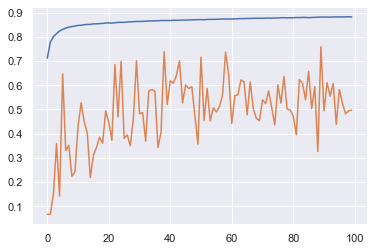

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']);

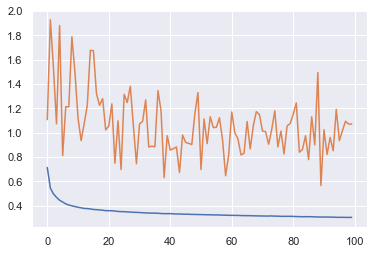

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']);

In [41]:
y_pred=model.predict(val_X)
y_pred=np.argmax(y_pred, axis=-1)

633/633 [==============================] - 1s 2ms/step


In [42]:
y_pred_enc=pd.get_dummies(y_pred)
val_y_enc=pd.get_dummies(val_y)

In [43]:
print(accuracy_score(val_y_enc, y_pred_enc))

0.9517649962972106


In [44]:
print(classification_report(val_y_enc, y_pred_enc))

              precision    recall  f1-score   support

           0       0.22      0.20      0.21       114
           1       0.47      0.39      0.43       792
           2       0.75      0.69      0.72       237
           3       0.97      0.98      0.98     19112

   micro avg       0.95      0.95      0.95     20255
   macro avg       0.60      0.57      0.58     20255
weighted avg       0.95      0.95      0.95     20255
 samples avg       0.95      0.95      0.95     20255



In [45]:
val_y_enc['Enfermo']=val_y_enc['Enfermo']*2
val_y_enc['Muerto']=val_y_enc['Muerto']*3
val_y_enc['Sano']=val_y_enc['Sano']*4
y_pred_enc[1]=y_pred_enc[1]*2
y_pred_enc[2]=y_pred_enc[2]*3
y_pred_enc[3]=y_pred_enc[3]*4
val_y_enc['respuesta']=val_y_enc[[ "Critico","Enfermo","Muerto","Sano"]].sum(axis=1)
y_pred_enc['respuesta']=y_pred_enc[[0,1,2,3]].sum(axis=1)

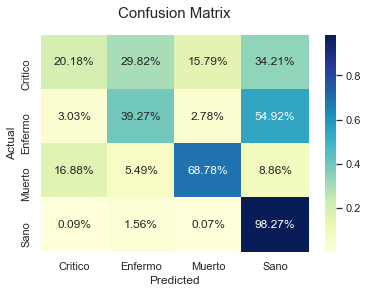

In [46]:
target_names=[ "Critico","Enfermo","Muerto","Sano"]
cm = confusion_matrix(val_y_enc['respuesta'], y_pred_enc['respuesta'])
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2%', cmap="YlGnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix', y=1.05, size=15);

## KNN

In [47]:
scaler=StandardScaler()
train_X=pd.DataFrame(scaler.fit_transform(train_X))
val_X=pd.DataFrame(scaler.fit_transform(val_X))
print(train_X.shape) 
print(val_X.shape)

(306496, 133)
(20255, 133)


In [48]:
knn.fit(train_X, train_y)
y_pred=knn.predict(val_X)
print('--------------The Accuracy of the model----------------------------')
print('The accuracy of the KNN model is',round(accuracy_score(val_y, y_pred)*100,2))
print(accuracy_score(val_y, y_pred))

--------------The Accuracy of the model----------------------------
The accuracy of the KNN model is 82.36
0.8236484818563318


In [49]:
kfold = KFold(n_splits=10, random_state=None)
result_dt=cross_val_score(knn,final_df_x,df_y,cv=10,scoring='accuracy')
print('The cross validated score for KNN model is:',round(result_dt.mean()*100,2))

The cross validated score for KNN model is: 94.93


In [50]:
print(classification_report(val_y, y_pred))

              precision    recall  f1-score   support

     Critico       0.06      0.18      0.09       114
     Enfermo       0.17      0.72      0.28       792
      Muerto       0.33      0.85      0.48       237
        Sano       0.99      0.83      0.90     19112

    accuracy                           0.82     20255
   macro avg       0.39      0.65      0.44     20255
weighted avg       0.95      0.82      0.87     20255



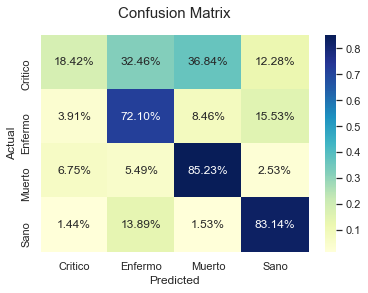

In [51]:
target_names=[ "Critico","Enfermo","Muerto","Sano"]
cm = confusion_matrix(val_y, y_pred)
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
sns.heatmap(cmn, annot=True, fmt='.2%', cmap="YlGnBu",xticklabels=target_names, yticklabels=target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix', y=1.05, size=15);